### What are the types of missing data?
1) Missing completely at Random

2) Missing not at Random

3) Missing at Randon


### 1) Missing Complete at Random(MCAR):
A variable is missing completely at random if the probablity of missing is the same for all the observations, when the data is MCAR, there is absolutely no relationship between the data missing and any other values, obsrved or missing,within the datasets.
In Other words, those missing are a random subset of data. There is nothing systematic going on that makes some data more likely to be missing than others.



In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
# To check how many null value are presents

df.isnull().sum()


#Age have 177 null and cabin is 687 null, embarked- 2

#Emabrked - means from where you check in and from where you out

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Do you think Is Age and Cabin have some relationship?
yes, there is relationship between them.

**Ebarked** column have mcar 

In [6]:
df[df.Embarked.isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### 2) Missing Data Not at Random

When there is some relationship

Cabin and age have mnr relationship


In [16]:
#Whereever the cabin has the null value we will replace it with 1 if not then 0

df['Cabin_null']= np.where(df.Cabin.isnull(),1,0)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [17]:
#Find the percentage of null value

df['Cabin_null'].mean()



0.7710437710437711

In [18]:
# the mean of the missing value for the cabin who has Survived

#0-Died---- so more missing
#1-Live---- so less missing

df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

### 3) Missing at Random

Men- Hide their salary

Women- Hide their age


## All the technique to handle missing values

1) Mean/Median/Mode Replacement

2) Random sampling imputation

3) Capturing NaN values with a new feature

4) End of distribution

5) Arbitrary Imputation

6) Frequent Category Imputation

### 1) Mean/Median/Mode imputation:

**When to apply?**
Mean/Median/Mode imputation has the assumption that the data are missing completely as random(MCAR). 





In [17]:
df= pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
# Let's see the percentage of null value for each column

df.isnull().mean()

#So only age age have null values

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [11]:
#How many null values?

df.Age.isnull().sum()

177

In [9]:
df.shape

(891, 3)

In [18]:
# Now setting up the median value

def impute_nan(df, variable, tech):
    df[variable+'_Median']= df[variable].fillna(tech)

    
    

In [19]:
#For now we are chossing the median technique

tech= df['Age'].median()
tech

28.0

In [20]:
impute_nan(df, 'Age', tech)
df.head()

,Survived,Age,Fare,Age_Median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [21]:
# After the imputation whether this new column std is changed or not?

#It's an minor different so we will continue this technique

df.Age.std(), df.Age_Median.std()

(14.526497332334042, 13.019696550973201)

In [22]:
# We can this by matplotlib by graph

import matplotlib.pyplot as plt
%matplotlib inline

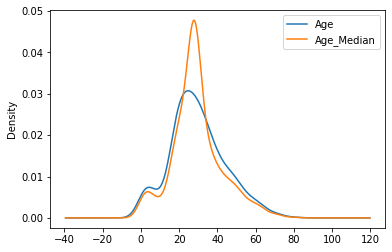

In [23]:
fig= plt.figure()
ax= fig.add_subplot(111)

df['Age'].plot(kind= 'kde', ax=ax)
df.Age_Median.plot(kind='kde', ax=ax)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


In [ ]:
#Advanteages : 



# Day 2

### 2) Random Sample Imputation
**Aim:** Random sample imputation consist of taking random observation from the dataset and we use this observation to replace the NaN values


**When It should be used? **

It assumes that data are completely missing at random


In [24]:
df =pd.read_csv('titanic.csv', usecols=['Age','Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [24]:
# How to check percentage

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [51]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),  random_state=0)



423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [41]:
df['Age'].isnull().sum()

177

In [25]:
# Now we replace the nan value with random sampalling values
#Comparing both with median and random sample

def imputed_nan2(df, variable, tech):
    #For median technique
    df[variable+'_Median']= df[variable].fillna(tech)
    
    #Now work for Random Sampalling
    
    df[variable+'_Random']= df[variable]
    # It will have random sample to fill the na
    random_sample= df[variable].dropna().sample(df[variable].isnull().sum(),  random_state=0)
    # Now pandas need to have the same index to merge the dataset
    
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_Random']= random_sample
    

In [26]:
median= df['Age'].median()
median
imputed_nan2(df,'Age',tech)

In [69]:
df.head()

,Survived,Age,Fare,Age_Median,Age_Random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

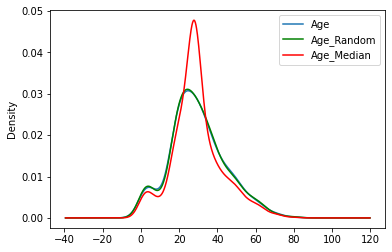

In [28]:
fig= plt.figure()
ax= fig.add_subplot(111)

df['Age'].plot(kind= 'kde', ax=ax)
df.Age_Random.plot(kind='kde', ax=ax, color='green')
df.Age_Median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [29]:
df.Age.std(), df.Age_Random.std()

(14.526497332334042, 14.56365408956869)

**Advantages of Random Sampling :**
1) Easy to implement

2) there is less distortion in varaince


**Disadvantages of Random Sampling :**
1) Randomeness won't work for every situation


## 3 rd Technique------ Capturing NaN value with a new feature

It works well if the data not mising completely at random
When there is some relationship with in missing columns


Define--- Create a new feature that will captuare the importance of nan value-------where null----fill 1 and where not null----fill 1

and orignal feature coulmn nan-------- here we can fill nan with any way- mean/median/mode



In [2]:
df=pd.read_csv('titanic.csv',usecols=['Age', 'Fare', 'Survived'])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [3]:
# Create new feature
#Where age is null fill 1 and vice versa

df['Age_NaN']= np.where(df.Age.isnull(), 1,0)


In [4]:
# Now we can replace age null value

df.Age.fillna(df.Age.median(), inplace=True)

In [5]:
df.head(10)

#It capture the imporatnt of missing value

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [ ]:
# So now Age_NaN will give some extra imporatnce to Age blank value

**Advantages**
1) Easy to implement

2) Capture the impotance of missing value


**Disadvantages**
1) Creating additional features(this will leads to Curse of Dimensionality)


#### End of distribution imputation

It works if data is not missing completely as random.

Capture the importance of missing values

In [7]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


<AxesSubplot:>

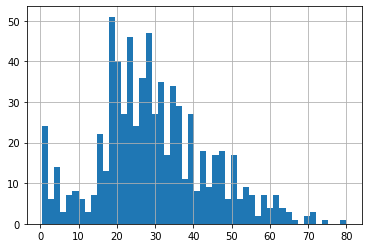

In [35]:
df.Age.hist(bins=50)

In [36]:
#We will try to take the far end of distribution

#It's for central value
df.Age.mean()




29.69911764705882

In [8]:
#We need to find far end median
extreme= df.Age.mean()+ 3*df.Age.std()
extreme

73.27860964406094

c:\users\sairam\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

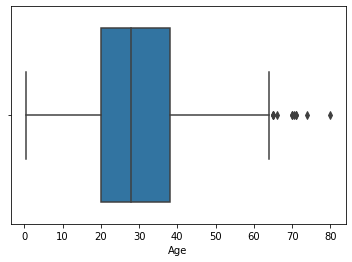

In [9]:
#To check outliers as this technique help in outliers
import seaborn as sns

sns.boxplot('Age', data=df)

#Here we can see we have ouliers


In [10]:
def impute_nan3(df, variable, median, extreme):
    df[variable+'_end_distribution']= df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)
    

In [11]:
impute_nan3(df,'Age',df.Age.median(), extreme)

In [12]:
df.head(20)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

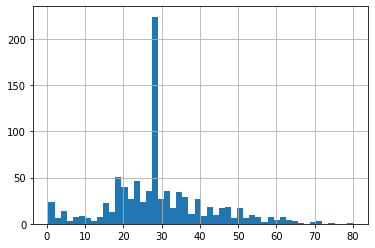

In [13]:
df['Age'].hist(bins=50)

#As all NaN values are in between

<AxesSubplot:>

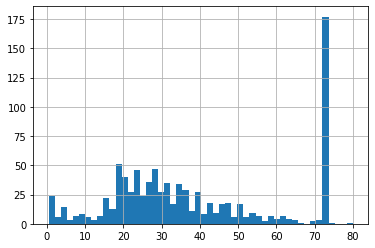

In [14]:
df['Age_end_distribution'].hist(bins=50)

#As all NaN values are in last

c:\users\sairam\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

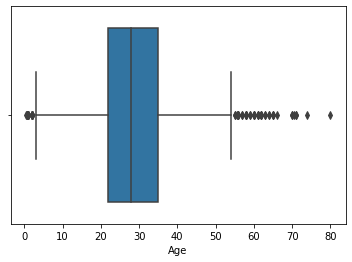

In [15]:
#so what's is benefit?

#It emoves all the outliers from data, Let's see

sns.boxplot('Age',data=df)


c:\users\sairam\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_end_distribution'>

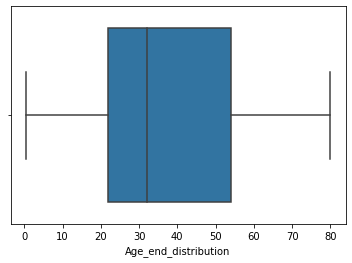

In [16]:
sns.boxplot('Age_end_distribution',data=df)

#Outliers has been removed

**Advantages**
1) Easy to implement

2) Capture the importance of missingness if there is one



**Disadvantages**

1) Disorts the original distribution
